In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from nex.colors import cols as papercols, inverse_cols, loop_over_args

import jaxley as jx

In [2]:
setups = ["473601979", "480353286", "485574832", "488683425"]

In [3]:
def read_cell(fname, ncomp, rotation):
    cell = jx.read_swc(fname, nseg=ncomp, assign_groups=True)
    cell.rotate(rotation)
    return cell

In [16]:
time_vec = np.arange(0, 1150+0.025*2, 0.025)

In [17]:
# with open(f"../cell_types/specimen_{setup}/ephys_01.pkl", "rb") as handle:
#     ephys = pickle.load(handle)
# ephys_rec = ephys["response"]
# ephys_time_vec = ephys["time"]

# Very large

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


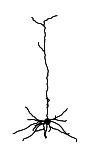

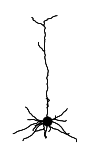

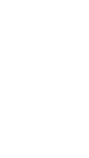

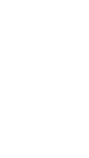

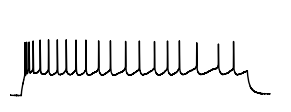

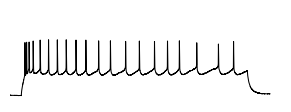

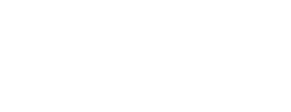

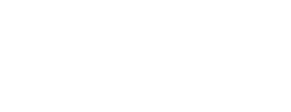

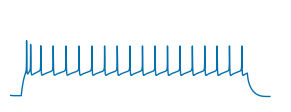

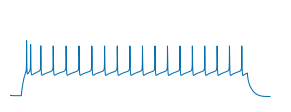

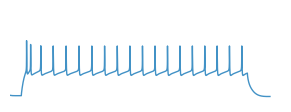

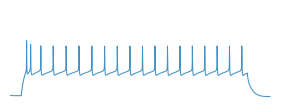

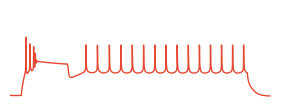

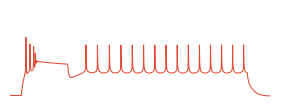

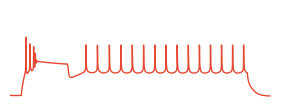

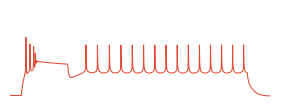

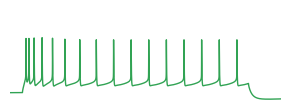

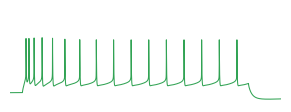

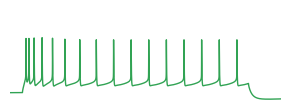

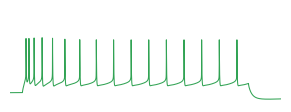

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


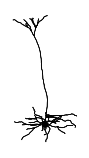

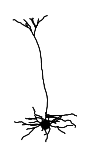

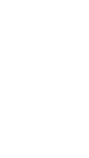

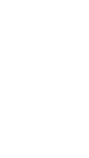

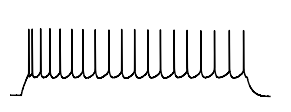

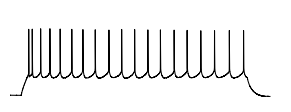

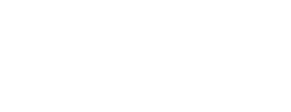

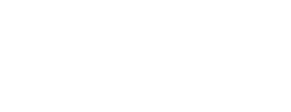

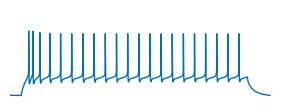

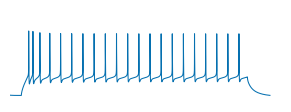

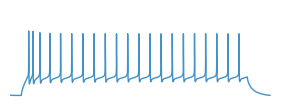

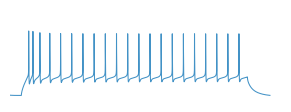

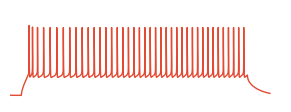

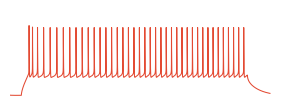

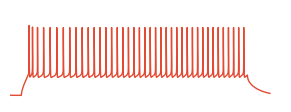

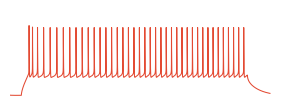

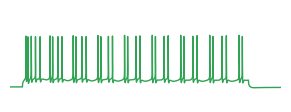

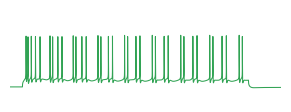

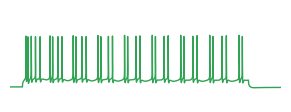

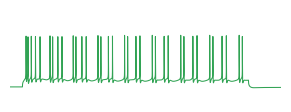

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


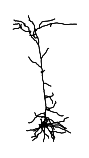

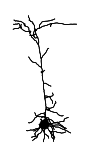

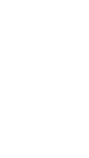

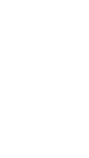

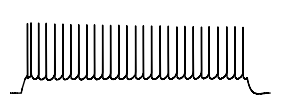

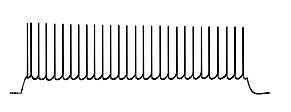

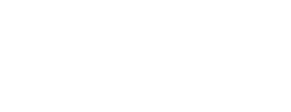

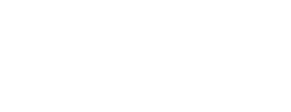

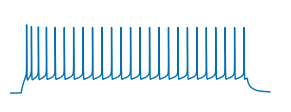

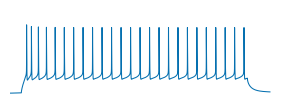

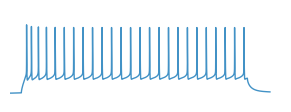

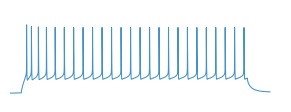

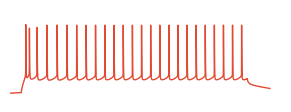

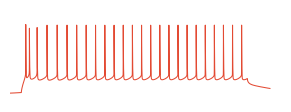

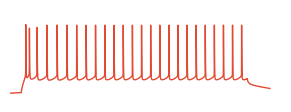

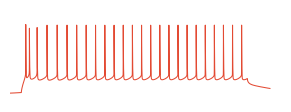

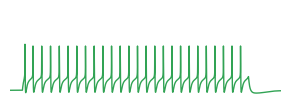

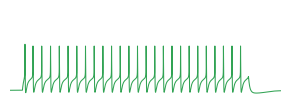

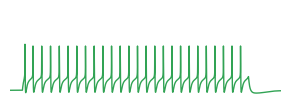

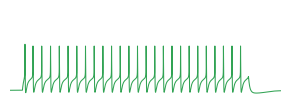

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


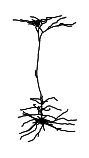

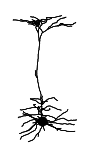

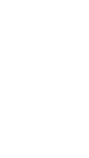

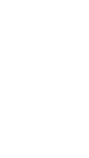

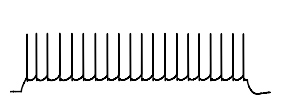

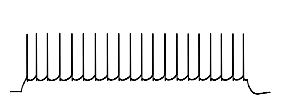

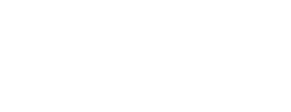

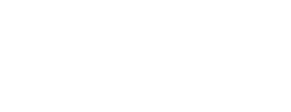

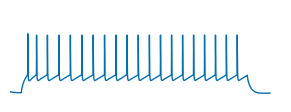

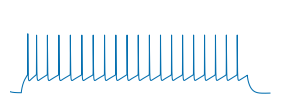

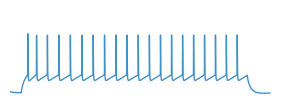

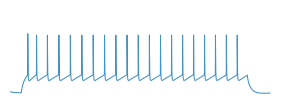

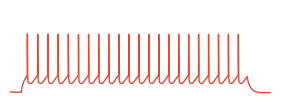

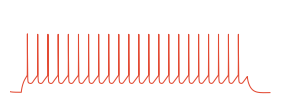

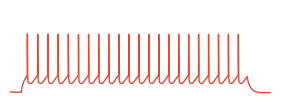

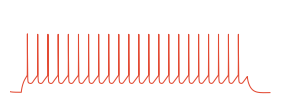

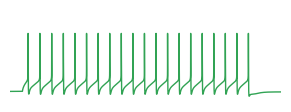

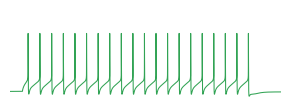

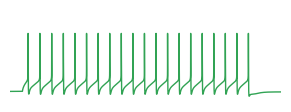

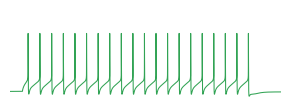

In [24]:
rotations = {
    "473601979": 195,
    "480353286": 170,
    "485574832": 155,
    "488683425": 195,
}
for setup in setups:
    with open(f"../../../paper/fig3_l5pc/results/02_allen_revision/gd_{setup}.pkl", "rb") as handle:
        trace_gd = pickle.load(handle)

    with open(f"../../../paper/fig3_l5pc/results/02_allen_revision/ga_{setup}.pkl", "rb") as handle:
        trace_ga = pickle.load(handle)

    # with open(f"../cell_types/specimen_{setup}/ephys_01.pkl", "rb") as handle:
    #     ephys = pickle.load(handle)
    # ephys_rec = ephys["response"]
    # ephys_time_vec = ephys["time"]

    ###################################
    ####### Experimental trace ########
    ###################################
    dt = 0.025
    time_pad_on = 50.0
    time_pad_off = 100.0
    junction_potential = -14.0
    
    with open(f"../cell_types/specimen_{setup}/ephys_01.pkl", "rb") as handle:
        ephys = pickle.load(handle)
    
    dt_stim = np.mean(np.diff(ephys["time"]))
    dt_difference = dt / dt_stim / 1000
    
    ephys_stim = ephys["stimulus"][::int(dt_difference)]
    ephys_rec = ephys["response"][::int(dt_difference)] + junction_potential
    ephys_time_vec = ephys["time"][::int(dt_difference)]
    
    stim_onset = np.where(ephys_stim > 0.05)[0][0]
    protocol_start = int(stim_onset - time_pad_on / 0.025)
    
    stim_offset = np.where(ephys_stim < 0.05)[0]
    stim_offset = stim_offset[stim_offset > 20_000][0]
    protocol_end = int(stim_offset + time_pad_off / 0.025)
    
    ephys_stim = ephys_stim[protocol_start:protocol_end]
    ephys_rec = ephys_rec[protocol_start:protocol_end]
    ephys_time_vec = ephys_time_vec[protocol_start:protocol_end] * 1000
    ephys_time_vec -= ephys_time_vec[0]
    
    swc_fname = f"../cell_types/specimen_{setup}/reconstruction.swc"
    cell = read_cell(swc_fname, 2, rotations[setup])

    #######################################
    ######## ALLEN DATABASE FITS ##########
    #######################################
    with open(f"../allen_database_fits/neuronal_model_{setup}/allen_fit.pkl", "rb") as handle:
        sims_allen = pickle.load(handle)
    with open(f"../allen_database_fits/neuronal_model_{setup}/allen_fit_time.pkl", "rb") as handle:
        time_allen = pickle.load(handle)

    @loop_over_args({})
    def vis_morph(colors, figsize):
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax = cell.vis(ax=ax, col=colors["data"], morph_plot_kwargs={"linewidth": 0.2})
        ax = cell.soma[0, 0].vis(ax=ax, col=colors["soma"], morph_plot_kwargs={"linewidth": 0.2, "zorder": 1000})
        ax = cell.apical.vis(ax=ax, col=colors["apical"], morph_plot_kwargs={"linewidth": 0.5})
        ax = cell.axon.vis(ax=ax, col=colors["axon"], morph_plot_kwargs={"linewidth": 0.5})
        ax = cell.basal.vis(ax=ax, col=colors["basal"], morph_plot_kwargs={"linewidth": 0.5})
        _ = ax.spines["left"].set_visible(False)
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
    vis_morph(f"panel_d1_very_large_{setup}", figsize=(0.9, 1.8))

    @loop_over_args({})
    def vis_rec(colors, figsize):
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.plot(ephys_time_vec, ephys_rec, c=colors["data"])
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
    vis_rec(f"panel_d2_very_large_{setup}", figsize=(3.5, 1.2))

    @loop_over_args({})
    def vis_ephys(colors, figsize):
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.plot(time_vec, trace_gd, c=colors["jaxley"])
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
    vis_ephys(f"panel_d3_very_large_{setup}", figsize=(3.5, 1.2))

    @loop_over_args({})
    def vis_ephys_ga(colors, figsize):
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.plot(time_vec, trace_ga, c="#e34a33")
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
    vis_ephys_ga(f"panel_d4_very_large_{setup}", figsize=(3.5, 1.2))

    @loop_over_args({})
    def vis_ephys_allen(colors, figsize):
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        time_ = time_allen[180_000:420_000]
        time_ -= time_[0]
        ax.plot(time_, sims_allen[193_000:433_000], c="#31a354")
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
    vis_ephys_allen(f"panel_d5_very_large_{setup}", figsize=(3.5, 1.2))


In [25]:
import time
import IPython.display as IPd
from svgutils.compose import *

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

In [26]:
# import matplotlib as mpl
# with mpl.rc_context(fname="../../../.matplotlibrc"):
#     fig, ax = plt.subplots(1, 1, figsize=(3, 3))
#     _ = ax.plot(np.linspace(0, 1, 10), color="k")
#     _ = ax.plot(np.linspace(0, 2, 10), color=papercols["jaxley"])
#     _ = ax.plot(np.linspace(0, 3, 10), color="#e34a33")
#     _ = ax.plot(np.linspace(0, 4, 10), color="#31a354")
#     _ = ax.legend(
#         ["Data", "Gradient descent", "Genetic algorithm", "Allen Cell Types Database - all-active model"], 
#         ncol=4,
#     )
#     plt.savefig("../svg/legend.svg", bbox_inches="tight")
#     plt.show()

In [27]:
f = Figure(
    "18.0cm",
    "16.7cm",
    Panel(SVG("../svg/daily/standard/panel_d1_very_large_485574832.svg").scale(svg_scale)).move(0, 8),
    Panel(SVG("../svg/daily/standard/panel_d1_very_large_488683425.svg").scale(svg_scale)).move(350, 8),
    Panel(SVG("../svg/daily/standard/panel_d1_very_large_480353286.svg").scale(svg_scale)).move(0, 328),
    Panel(SVG("../svg/daily/standard/panel_d1_very_large_473601979.svg").scale(svg_scale)).move(350, 328),
    
    Panel(SVG("../svg/daily/standard/panel_d2_very_large_485574832.svg").scale(svg_scale)).move(65, -10),
    Panel(SVG("../svg/daily/standard/panel_d2_very_large_488683425.svg").scale(svg_scale)).move(420, -10),
    Panel(SVG("../svg/daily/standard/panel_d2_very_large_480353286.svg").scale(svg_scale)).move(65, 310),
    Panel(SVG("../svg/daily/standard/panel_d2_very_large_473601979.svg").scale(svg_scale)).move(420, 310),

    Panel(SVG("../svg/daily/standard/panel_d3_very_large_485574832.svg").scale(svg_scale)).move(65, 55.5),
    Panel(SVG("../svg/daily/standard/panel_d3_very_large_488683425.svg").scale(svg_scale)).move(420, 55.5),
    Panel(SVG("../svg/daily/standard/panel_d3_very_large_480353286.svg").scale(svg_scale)).move(65, 375.5),
    Panel(SVG("../svg/daily/standard/panel_d3_very_large_473601979.svg").scale(svg_scale)).move(420, 375.5),

    Panel(SVG("../svg/daily/standard/panel_d4_very_large_485574832.svg").scale(svg_scale)).move(65, 121),
    Panel(SVG("../svg/daily/standard/panel_d4_very_large_488683425.svg").scale(svg_scale)).move(420, 121),
    Panel(SVG("../svg/daily/standard/panel_d4_very_large_480353286.svg").scale(svg_scale)).move(65, 441),
    Panel(SVG("../svg/daily/standard/panel_d4_very_large_473601979.svg").scale(svg_scale)).move(420, 441),

    Panel(SVG("../svg/daily/standard/panel_d5_very_large_485574832.svg").scale(svg_scale)).move(65, 186.5),
    Panel(SVG("../svg/daily/standard/panel_d5_very_large_488683425.svg").scale(svg_scale)).move(420, 186.5),
    Panel(SVG("../svg/daily/standard/panel_d5_very_large_480353286.svg").scale(svg_scale)).move(65, 506.5),
    Panel(SVG("../svg/daily/standard/panel_d5_very_large_473601979.svg").scale(svg_scale)).move(420, 506.5),

    Panel(SVG("../svg/legend.svg").scale(svg_scale)).move(0, 615.5),
)

!mkdir -p fig
f.save("../fig/fig3_appendix_allen_comparison.svg")
svg("../fig/fig3_appendix_allen_comparison.svg")

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
